In [145]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os


In [440]:
def find_lines(frac = 0.4, save=False):
    i, j = 3, -1
    last = 0
    pivot = 0
    
    global num_lines, sumheigt
    
    chist = np.convolve(hhist, np.ones(hwindow)/hwindow, mode='same')
    
    interval = 5

    while i < chist.size:
        if j == -1 and chist[i] < interval:
            last = i

        if chist[i] >= interval:
            j = i + 1
            
            if save:
                print(last, j, chist[j])
            
            while j < chist.size - 1 and chist[j] >= interval:
                j += 1

            if save:
                print(last, j)
                
            if (j - last) * num_lines >= frac * sumheigt:
                
                mn = min(chist[max(i-30, 0):i])
                cl = last
                while cl > pivot and cl >= mn:
                    cl -= 1
                    
                last = (4*last + 2*cl) // 6
                
                mn = min(chist[j:j+30])
                while j < chist.size - 1 and (mn < chist[j + 1]):
                    j += 1
                
                pivot = j
                num_lines += 1
                sumheigt += j - last
                if save:
                    hlines.append([last, j])
                    print(last, j, "<-")
                last = j
                i = j
                j = -1
        i += 1
        pass
    pass
   



In [564]:
def find_letters(frac=0.3, save=False):

    global num_letters, sumwidth
    
    for x, y in hlines:
        vlines = []
        vhist = np.sum(data[x:y + 1, :], axis=0)
        
        vhist = np.convolve(vhist, np.ones(vwindow)/vwindow, mode='same')
        
        i, j = 3, -1
        last = 0
        pivot = 0
        
        if save and x < 100:
            plt.plot(vhist)
            
        interval = 1

        while i < vhist.size - 5:
            if j == -1 and vhist[i] < interval:
                last = i
                
            if np.mean(vhist[i:i+5]) >= interval:
                j = i + 1

                while j < vhist.size - 1 and np.mean(vhist[j:j+5]) > interval:
                    j += 1                    
                    
                if (not save) or (j - last) * num_letters >= frac / 2 * sumwidth:
                    
                    mn = min(vhist[max(0, i-20):i])
                    cl = last
                    while cl > pivot and cl >= mn:
                        cl -= 1
                    last = (4*last + 2*cl) // 6

                    mn = min(vhist[j:j+20])

                    while j < vhist.size - 1 and (sum(vhist[j:j+3])>4*mn) and (sum(vhist[j:j+1]) > 0 
                                                                               or (save and (j - last) * num_letters < 0.4 * sumwidth)):
                        j += 1
                        
                    num_letters += 1
                    sumwidth += j - last
                    if save:
                        vlines.append([last, j])
                    last = j
                    i = j
                    pivot = j
                    j = -1
                else :
                    i += int(frac / 3 * sumwidth / num_letters)

            i += 1
        
        if save:
            chunks.append(vlines)




In [597]:
data_folder = 'Cleansed alphabet data/new/'
name = 'Untitled86.jpg'
img = Image.open(data_folder + name)
img.load()
data = np.asarray(img, dtype="int32")

In [598]:
data.shape

(1969, 540)

In [599]:
if len(data.shape) == 3:
    data = np.mean(data, axis=-1)

In [600]:
data = 1 - data/255.0

In [601]:
hhist = np.sum(data, axis=1)
hhist.shape

(1969,)

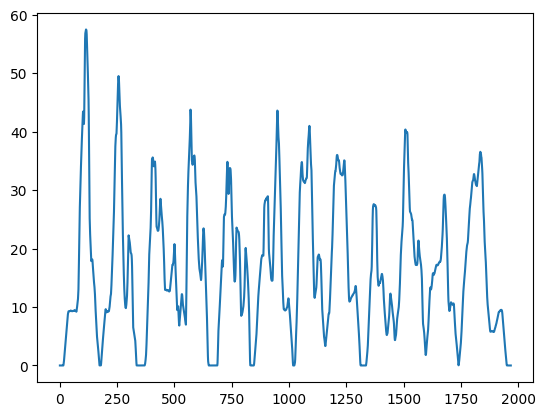

In [602]:
hwindow = 20
vwindow = 8

chist = np.convolve(hhist, np.ones(hwindow)/hwindow, mode='same')

plt.plot(chist)
plt.show()

In [603]:
hlines = []
chunks = []


sumheigt = 0
sumwidth = 0
num_letters = 0
num_lines = 0


find_lines(0.3)
find_lines(0.3, True)

find_letters(0.3)
find_letters(0.3)

print('avg width: ', sumwidth / num_letters)
print('avg height: ', sumheigt / num_lines)

find_letters(0.3, True)

27 29 5.908627450980392
27 162
18 173 <-
188 190 5.440980392156863
188 326
183 337 <-
379 381 6.75607843137255
379 644
365 649 <-
691 693 6.810392156862744
691 828
677 835 <-
857 859 6.2305882352941175
857 1011
849 1018 <-
1030 1032 6.231372549019609
1030 1153
1026 1158 <-
1163 1165 5.8217647058823525
1163 1306
1161 1313 <-
1345 1347 6.26078431372549
1345 1461
1334 1462 <-
1465 1467 5.243137254901962
1465 1592
1464 1596 <-
1604 1606 5.686078431372548
1604 1729
1601 1739 <-
1751 1753 5.8274509803921575
1751 1940
1747 1953 <-
avg width:  139.6086956521739
avg height:  164.36363636363637


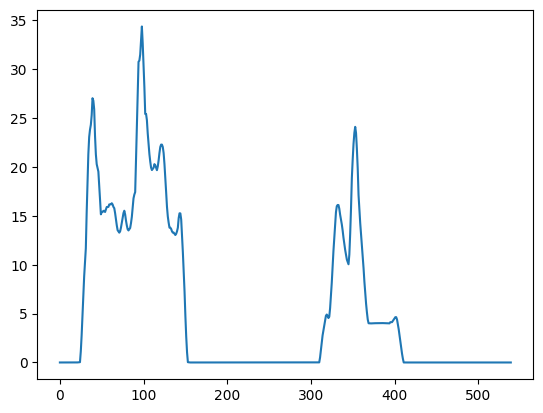

In [604]:
plt.show()

In [605]:
def crop(image, i, j):
    box = [chunks[i][j][0], hlines[i][0], chunks[i][j][1], hlines[i][1]]
    return image.crop(box)

[311, 1464, 436, 1596]
(125, 132)


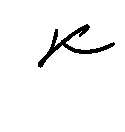

In [607]:
x, y = 8, 1
a = crop(img, x, y)
print([chunks[x][y][0], hlines[x][0], chunks[x][y][1], hlines[x][1]])
print(a.size)
a

In [119]:
folder = name.split('.')[0]
path = data_folder + folder
print(folder)
os.mkdir(path)

for i in range(len(hlines)):
    for j in range(len(chunks[i])):
        image = crop(img, i, j)
        image.save('{}/{}_{}_{}.png'.format(path, folder, i, j))



IMG_8233


In [263]:
def process_image(name):
    global sumheigt, sumwidth, hlines, img, chunks
    global num_letters, num_lines, hhist, data
    global hwindow, vwindow
    

    img = Image.open(name)
    img.load()
    data = np.asarray(img, dtype="int32")
    if len(data.shape) == 3:
        data = np.mean(data, axis=-1)
    data = 1 - data/255.0
    hhist = np.sum(data, axis=1)
    
    hwindow = 20
    vwindow = 8    
    
    hlines = []
    chunks = []


    sumheigt = 0
    sumwidth = 0
    num_letters = 0
    num_lines = 0

    find_lines(0.3)
    find_lines(0.3, True)

    find_letters(0.3)
    find_letters(0.3)

    print('avg width: ', sumwidth / num_letters)
    print('avg height: ', sumheigt / num_lines)

    find_letters(0.3, True)


In [608]:
import os
names = os.listdir(data_folder)

for name in names[2:]:
    
    folder = name.split('.')[0]
    path = data_folder + folder
    if os.path.isdir(path) or (not name[:3] == 'Unt') or name[-4:]!='.jpg':
        continue
    os.mkdir(path)
    
    process_image(data_folder + name)

    for i in range(len(hlines)):
        for j in range(len(chunks[i])):
            image = crop(img, i, j)
            image.save('{}/{}_{}_{}.png'.format(path, folder, i, j))
        

22 24 5.242941176470588
22 66
14 80 <-
92 94 5.608823529411765
92 147
88 158 <-
181 183 6.531372549019608
181 256
173 266 <-
283 285 6.487450980392157
283 344
277 353 <-
365 367 7.244705882352941
365 427
361 431 <-
443 445 5.794509803921569
443 496
439 513 <-
538 540 7.453333333333334
538 586
529 601 <-
623 625 6.253137254901961
623 680
615 693 <-
712 714 5.903333333333333
712 779
705 794 <-
822 824 5.946274509803921
822 890
812 894 <-
avg width:  71.85
avg height:  77.0
6 8 5.498627450980392
6 62
4 73 <-
98 100 5.602549019607842
98 158
89 185 <-
205 207 6.059411764705883
205 263
198 277 <-
292 294 5.63470588235294
292 381
287 381 <-
390 392 5.069019607843137
390 417
387 437 <-
452 454 6.5554901960784315
452 504
447 521 <-
541 543 6.706274509803922
541 604
534 616 <-
627 629 5.866470588235295
627 694
623 714 <-
730 732 5.533333333333333
730 802
724 809 <-
836 838 6.154509803921569
836 874
827 895 <-
avg width:  65.42105263157895
avg height:  78.8
4 6 7.188235294117646
4 77
3 89 <-
122 